<a href="https://colab.research.google.com/github/BillWorstell/derenzo_phantom/blob/master/iPytorchPhantom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open In Colab

https://vivekg.dev/DiffDRR/

install DiffDRR from PyPI:

In [ ]:
!pip install diffdrr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.2/737.2 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.2 MB/s eta 0:00:00


#Set up DiffDRR environment

In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 900.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=22bd1924f286acbff4b160e4c4b0aae703731f851513977276cfaa142ff08faf
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=45fa8e095fadead7f733c424938b5df090a2589cb1b49e98ce9e5935acdcd9b9
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu121_pyt210/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 45.8 MB/s eta 0:00:00


From https://github.com/rossbar/derenzo_phantom

From derenzo_log.py

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp

https://vivekg.dev/DiffDRR/

Usage

The following minimal example specifies the geometry of the projectional radiograph imaging system and traces rays through a CT volume:

#Install DiffDRR

Use the version of DiffDRR posted on github

In [ ]:
!pip install 'git+https://github.com/BillWorstell/DiffDRR.git'

  Cloning https://github.com/BillWorstell/DiffDRR.git to /tmp/pip-req-build-k1sn_t68
  Running command git clone --filter=blob:none --quiet https://github.com/BillWorstell/DiffDRR.git /tmp/pip-req-build-k1sn_t68
  Resolved https://github.com/BillWorstell/DiffDRR.git to commit 4e415ec1305a0ccf067cddf4bec24246807ec87b
  Preparing metadata (setup.py) ... done


In [ ]:
import torch

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

Install icecream for debug printing

https://github.com/gruns/icecream

In [ ]:
!pip install icecream
from icecream import ic

Git clone from github publib open source code to colab working directory

See https://stackoverflow.com/questions/50850216/google-colab-install-from-github-glrm

Read in the volume and get the isocenter

In [ ]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Sum volume over orthogonal projections

SumX = Volumes summed over X (YZ projection

SumY = Volumes summed over Y (YZ projection)

SumZ = Volumes summed over Z (YZ projection))

In [ ]:
ic(volume.shape)
SumX=volume.sum(0)
SumY=volume.sum(1)
SumZ=volume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ic| volume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


(512, 512)

Display projections

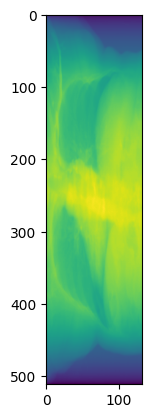

In [ ]:
plt.imshow(SumX)

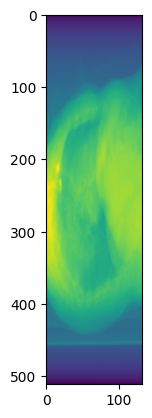

In [ ]:
plt.imshow(SumY)

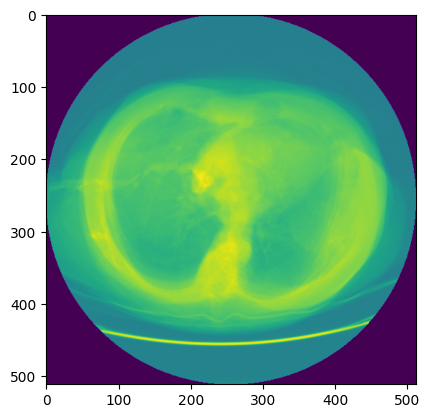

In [ ]:
plt.imshow(SumZ)

#Get derenzo_phantom version from github

In [ ]:
!rm /content/derenzo_phantom -rf
!git clone https://github.com/Billworstell/derenzo_phantom.git

Cloning into 'derenzo_phantom'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 111 (delta 20), reused 0 (delta 0), pack-reused 70
Receiving objects: 100% (111/111), 962.58 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (53/53), done.


look around

In [ ]:
!pwd
!ls -ltr

# importing module
import sys

# printing all directories for
# interpreter to search
sys.path.append('/content/derenzo_phantom/')

!ls -ltr /content
!ls -ltr /content/derenzo_phantom/
!ls -ltr /content/derenzo_phantom/derenzo_log.py

/content
total 8
drwxr-xr-x 1 root root 4096 Jan 11 17:02 sample_data
drwxr-xr-x 3 root root 4096 Jan 14 17:49 derenzo_phantom
total 8
drwxr-xr-x 1 root root 4096 Jan 11 17:02 sample_data
drwxr-xr-x 3 root root 4096 Jan 14 17:49 derenzo_phantom
total 1752
-rw-r--r-- 1 root root    303 Jan 14 17:49 README.md
-rw-r--r-- 1 root root   4270 Jan 14 17:49 derenzo_log.py
-rw-r--r-- 1 root root 888138 Jan 14 17:49 iphantom1.ipynb
-rw-r--r-- 1 root root 429523 Jan 14 17:49 iphantom2.ipynb
-rw-r--r-- 1 root root  31195 Jan 14 17:49 phantom.py
-rw-r--r-- 1 root root 429910 Jan 14 17:49 iphantom3.ipynb
-rw-r--r-- 1 root root 4270 Jan 14 17:49 /content/derenzo_phantom/derenzo_log.py


import DerenzoPhantom

In [ ]:
from phantom import DerenzoPhantom

Use reference phantom

ic| SectorMask.sum(): 28818.0
ic| self.mask.sum(): 28818.0
ic| SectorMask.sum(): 16216.0
ic| self.mask.sum(): 45034.0
ic| SectorMask.sum(): 11257.0
ic| self.mask.sum(): 56291.0
ic| SectorMask.sum(): 14414.0
ic| self.mask.sum(): 70705.0
ic| SectorMask.sum(): 20275.0
ic| self.mask.sum(): 90980.0
ic| SectorMask.sum(): 16790.0
ic| self.mask.sum(): 107770.0


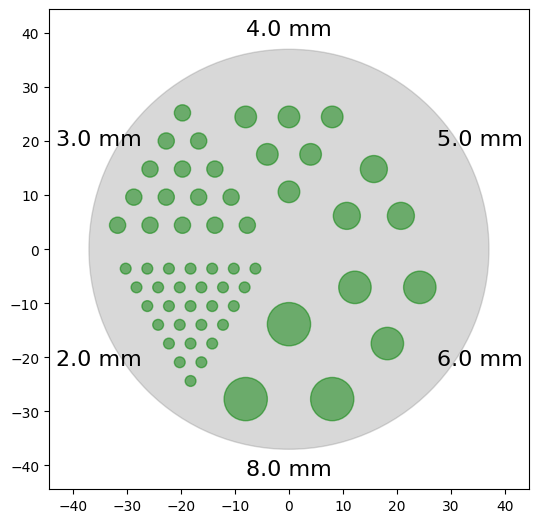

In [ ]:
radius = 37.0
well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)
test_phantom = DerenzoPhantom(radius, well_seps, )
test_phantom.show()

Generate Mask for reference phantom

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 107770.0


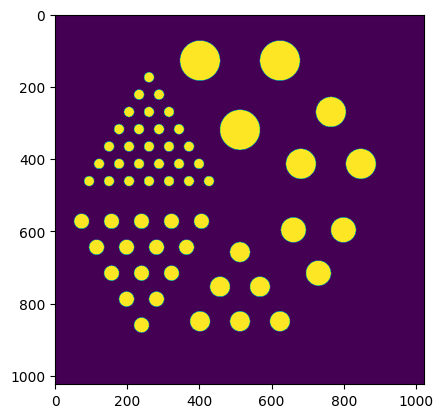

In [ ]:
myMask=test_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
plt.imshow(myMask)

make meshgrid from volume and spacing

In [ ]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Get lab frame coordinates for voxels in volume

In [ ]:
    xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
    ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
    zlinspace=np.linspace(-66.5*spacing[2], 66.5*spacing[2], 133)
    xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
    xgrid=xgrid.flatten()
    ygrid=ygrid.flatten()
    zgrid=zgrid.flatten()


Treat the phantom coordinate system origin as at the lab system origin, and treat the phantom coordinate axes as aligned with the lab system axes.

Then, there is only a scaling factor to get integer phantom coordinates for every voxel



In [ ]:
# Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ixPh=np.floor(((xgrid+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((ygrid+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zgrid+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]
ic| ixPh.max(): 3002
ic| ixPh.min(): -1979
ic| iyPh.max(): 3002
ic| iyPh.min(): -1979
ic| izPh.max(): 2
ic| izPh.min(): -2


-2

Insert phantom into source volume, replacing CT example

In [ ]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ)
volume[valid]=phantomMask[ixPh[valid],iyPh[valid]]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| phantomMask.shape: (1024, 1024)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


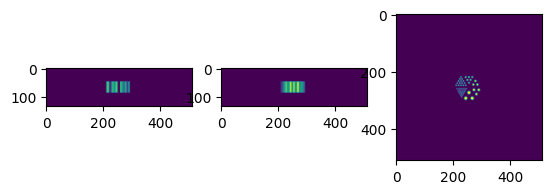

In [ ]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

plt.subplot(1,3,1)
plt.imshow(np.flipud(SumX.T))
plt.subplot(1,3,2)
plt.imshow(np.flipud(SumY.T))
plt.subplot(1,3,3)
plt.imshow(np.flipud(SumZ.T))

Display axial projection


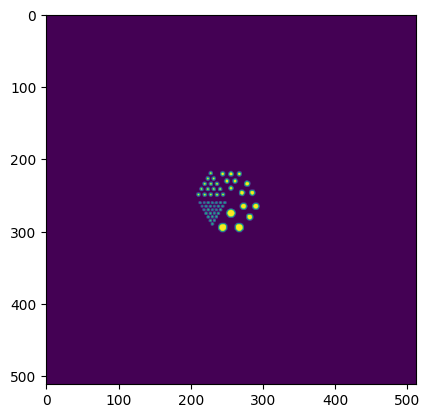

In [ ]:
plt.imshow(np.flipud(SumZ.T))

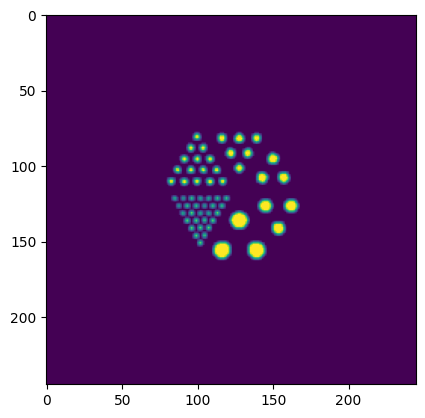

In [ ]:
plt.imshow(np.flipud(SumZ[128:373,128:373].T))

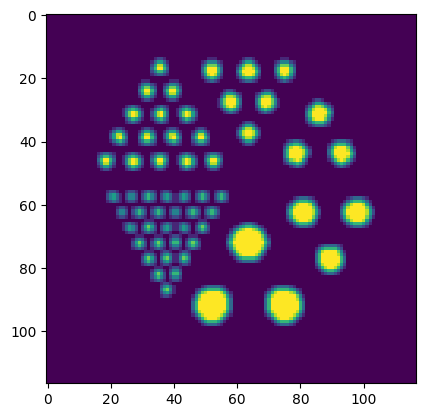

In [ ]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))

@ Now generate volume containing big high resolution phantom

A typical heart is approximately the size of your fist: 12 cm in length, 8 cm wide, and 6 cm in thickness.

Generate Big high resolution phantom

ic| SectorMask.sum(): 18392.0
ic| self.mask.sum(): 18392.0
ic| SectorMask.sum(): 20275.0
ic| self.mask.sum(): 38667.0
ic| SectorMask.sum(): 19710.0
ic| self.mask.sum(): 58377.0
ic| SectorMask.sum(): 16778.0
ic| self.mask.sum(): 75155.0
ic| SectorMask.sum(): 18587.0
ic| self.mask.sum(): 93742.0
ic| SectorMask.sum(): 20356.0
ic| self.mask.sum(): 114098.0


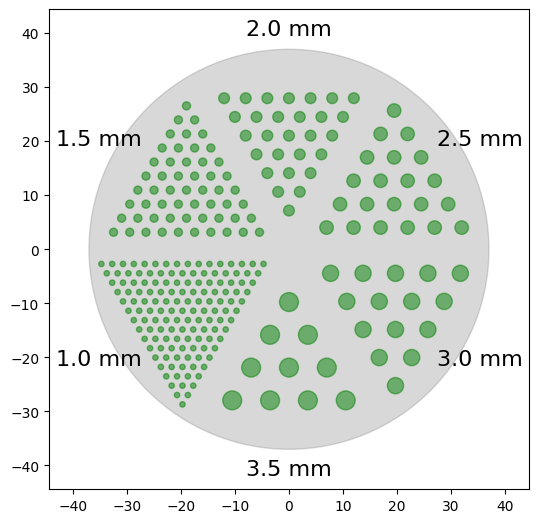

In [ ]:
radius = 37.0
well_seps = (3.5, 3.0, 2.5, 2.0, 1.5, 1.0)
big_phantom = DerenzoPhantom(radius, well_seps)
big_phantom.show()
bigMask=big_phantom.mask.reshape(1024,1024)

In [ ]:
ic(volume.shape)
volumeShape=volume.shape
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()

phantomMask=big_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ)
volume[valid]=phantomMask[ixPh[valid],iyPh[valid]]

volume=volume.reshape(volumeShape)
PVCvolume=volume
#PVCvolume=np.zeros(volume.shape,dtype=np.float32)
#PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volume.shape: (512, 512, 133)
ic| volumeShape: (512, 512, 133)
ic| phantomMask.shape: (1024, 1024)


Form and display orthogonal projections of Big High Resolution phantom

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


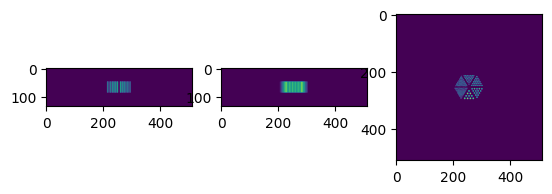

In [ ]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

plt.subplot(1,3,1)
plt.imshow(np.flipud(SumX.T))
plt.subplot(1,3,2)
plt.imshow(np.flipud(SumY.T))
plt.subplot(1,3,3)
plt.imshow(np.flipud(SumZ.T))

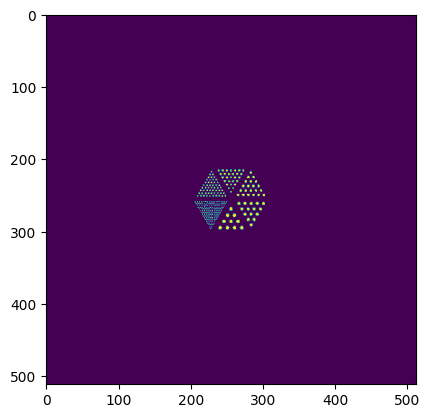

In [ ]:
plt.imshow(np.flipud(SumZ.T))

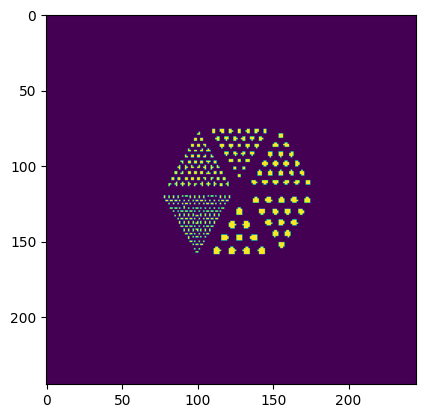

In [ ]:
plt.imshow(np.flipud(SumZ[128:373,128:373].T))

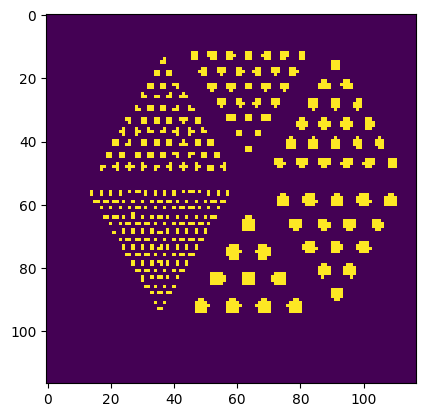

In [ ]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))

Low Resolution Phantom

ic| SectorMask.sum(): 24658.0
ic| self.mask.sum(): 24658.0
ic| SectorMask.sum(): 22252.0
ic| self.mask.sum(): 46910.0
ic| SectorMask.sum(): 19974.0
ic| self.mask.sum(): 66884.0
ic| SectorMask.sum(): 17804.0
ic| self.mask.sum(): 84688.0
ic| SectorMask.sum(): 15777.0
ic| self.mask.sum(): 100465.0
ic| SectorMask.sum(): 13852.0
ic| self.mask.sum(): 114317.0


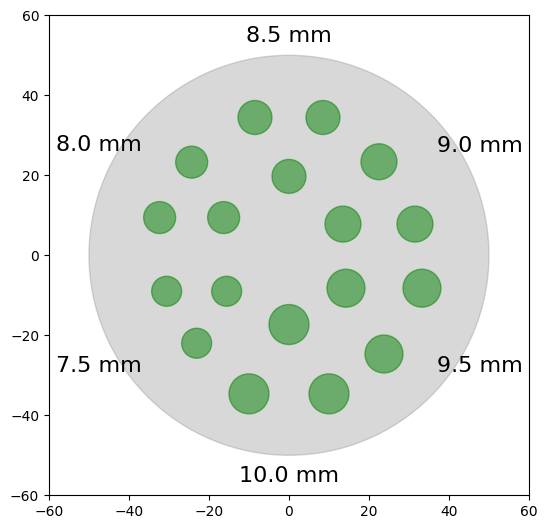

In [ ]:
radius = 50.0
well_seps = (10.0,9.5, 9.0, 8.5, 8.0, 7.5)

lowres_phantom = DerenzoPhantom(radius, well_seps)
lowres_phantom.show()

Get lab frame coordinates for voxels in volume

In [ ]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Treat the phantom coordinate system origin as at the lab system origin, and treat the phantom coordinate axes as aligned with the lab system axes.

Then, there is only a scaling factor to get integer phantom coordinates for every voxel

Generate 3D Volume

In [ ]:
ic(volume.shape)
volumeShape=volume.shape
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()

phantomMask=lowres_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ)
volume[valid]=phantomMask[ixPh[valid],iyPh[valid]]

volume=volume.reshape(volumeShape)
PVCvolume=volume
#PVCvolume=np.zeros(volume.shape,dtype=np.float32)
#PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
#PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volume.shape: (512, 512, 133)
ic| volumeShape: (512, 512, 133)
ic| phantomMask.shape: (1024, 1024)


Generate Mask for lowres phantom

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 114317.0


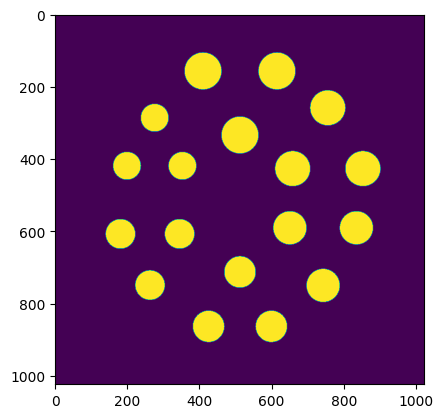

In [ ]:
myMask=lowres_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
plt.imshow(myMask)

make meshgrid from volume and spacing

In [ ]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Get lab frame coordinates for voxels in volume

In [ ]:
    xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
    ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
    zlinspace=np.linspace(-66.5*spacing[2], 66.5*spacing[2], 133)
    xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
    ic(xgrid.shape)
    xgrid=xgrid.flatten()
    ic(xgrid.shape)
    ygrid=ygrid.flatten()
    zgrid=zgrid.flatten()


ic| xgrid.shape: (512, 512, 133)
ic| xgrid.shape: (34865152,)


Treat the phantom coordinate system origin as at the lab system origin, and treat the phantom coordinate axes as aligned with the lab system axes.

Then, there is only a scaling factor to get integer phantom coordinates for every voxel

#Specify Phantom Geometry

In [ ]:
# Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
TranslatePhantom=[30.,40.,50.]

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| spacingPhantom: [0.09765625, 0.09765625, 100.0]


[0.09765625, 0.09765625, 100.0]

#Add Translation of Phantom

In [ ]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]

ixPh=np.floor(((xp1+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp1+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp1+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 50.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [30.0, 40.0, 50.0]
ic| ixPh.max(): 2048
ic| ixPh.min(): -1639
ic| iyPh.max(): 1945
ic| iyPh.min(): -1741
ic| izPh.max(): 1
ic| izPh.min(): -2


-2

Insert phantom into source volume, replacing CT example

In [ ]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()

phantomMask=lowres_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ)
volume[valid]=phantomMask[ixPh[valid],iyPh[valid]]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| phantomMask.shape: (1024, 1024)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


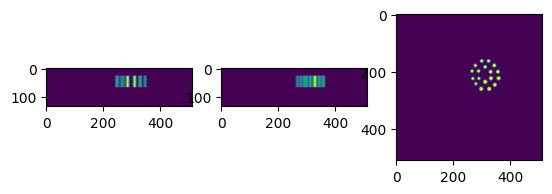

In [ ]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

plt.subplot(1,3,1)
plt.imshow(np.flipud(SumX.T))
plt.subplot(1,3,2)
plt.imshow(np.flipud(SumY.T))
plt.subplot(1,3,3)
plt.imshow(np.flipud(SumZ.T))

Display axial projection

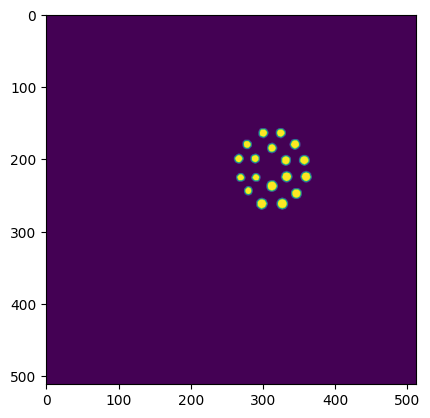

In [ ]:
plt.imshow(np.flipud(SumZ.T))

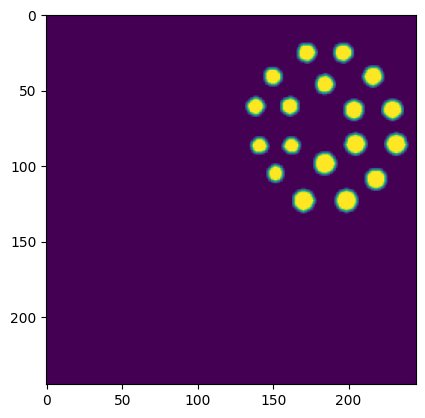

In [ ]:
plt.imshow(np.flipud(SumZ[128:373,128:373].T))

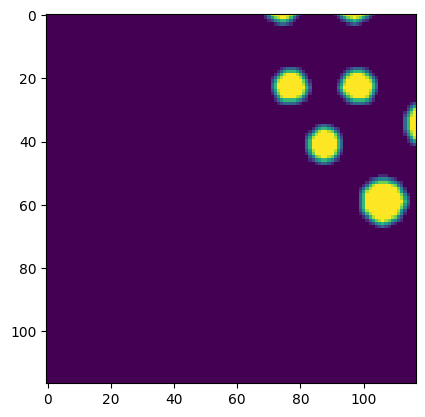

In [ ]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))

#Add rigid body rotation of phantom

Specify Phantom Geometry


In [ ]:
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
TranslatePhantom=[30.,40.,50.]
ic(TranslatePhantom)

import math as m
#phi=np.pi/4.
phi=0.40
#theta=np.pi/6.
theta=0.30
psi = 0.
RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [30.0, 40.0, 50.0]
ic| RotatePhantom: [0.4, 0.3, 0.0]
ic| spacingPhantom: [0.09765625, 0.09765625, 100.0]


[0.09765625, 0.09765625, 100.0]

Define Euler rotations

"yaw" means rotate around z axis, "pitch" means rotate around y axis, "roll" means rotate around x axis. We use z-y-x order, so the euler-angles order is [yaw, pitch, roll].


In [ ]:
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])


#R = Rz(psi) * Ry(theta) * Rx(phi)
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
#R_Invert = Rz(-psi) * Ry(-theta) * Rx(-phi)
print(np.round(R_Invert, decimals=2))

[[ 0.96  0.12 -0.27]
 [ 0.    0.92  0.39]
 [ 0.3  -0.37  0.88]]


In [ ]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 50.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [30.0, 40.0, 50.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-210., -210., -210., ...,  150.,  150.,  150.])
ic| xp2: matrix([[-167.07693104, -167.76256653, -168.44820202, ...,  129.14074708,
                   128.45511159,  127.7694761 ]])
ic| xp3: array([-167.07693104, -167.76256653, -168.44820202, ...,  129.14074708,
                 128.45511159,  127.7694761 ])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 2747
ic| ixPh.min(): -2126
ic| iyPh.max(): 2295
ic| iyPh.min(): -2426
ic| izPh.max(): 2
ic| izPh.min(): -3


-3

Insert phantom into source volume, replacing CT example

In [ ]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=lowres_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (799835,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


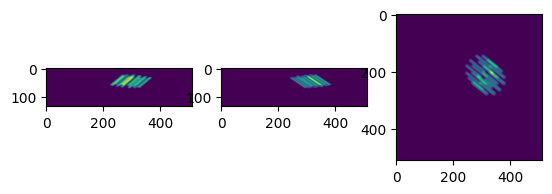

In [ ]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

plt.subplot(1,3,1)
plt.imshow(np.flipud(SumX.T))
plt.subplot(1,3,2)
plt.imshow(np.flipud(SumY.T))
plt.subplot(1,3,3)
plt.imshow(np.flipud(SumZ.T))

Display axial projection

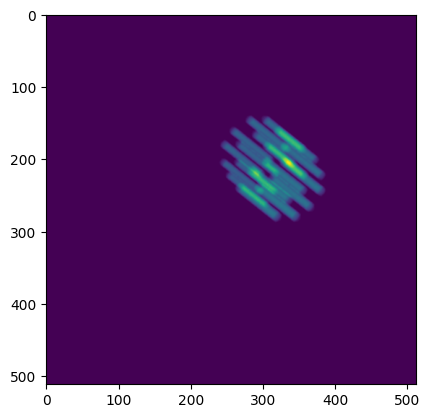

In [ ]:
plt.imshow(np.flipud(SumZ.T))

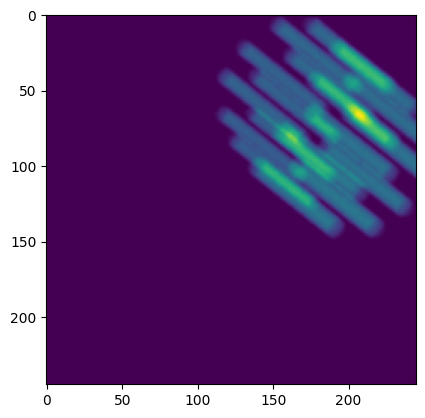

In [ ]:
plt.imshow(np.flipud(SumZ[128:373,128:373].T))

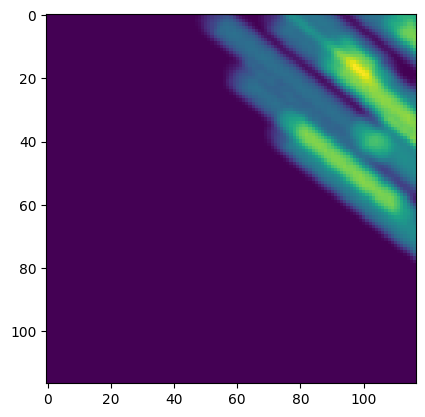

In [ ]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))